In [1]:
# Imports
import numpy as np
import tensorflow as tf

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

/Applications/anaconda/envs/tensorflow/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# MNIST data
import tensorflow.examples.tutorials.mnist.input_data as data
mnist = data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# Number of examples
print 'Number of training examples: ', mnist.train.num_examples
print 'Number of validation examples: ', mnist.validation.num_examples
print 'Number of testing examples: ', mnist.test.num_examples

Number of training examples:  55000
Number of validation examples:  5000
Number of testing examples:  10000


In [4]:
# Training data shape
print 'X shape: ', mnist.train.images.shape
print 'y shape: ', mnist.train.labels.shape

X shape:  (55000, 784)
y shape:  (55000, 10)


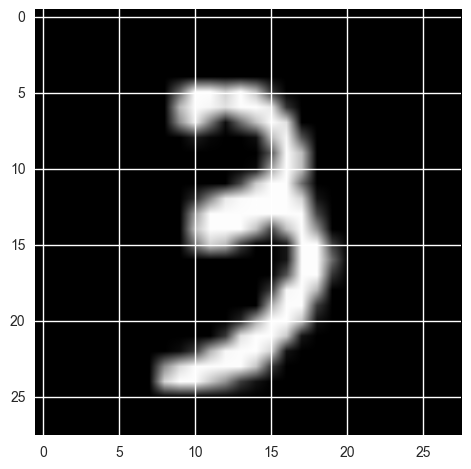

In [5]:
# Visualize a random image
side = int(np.sqrt(mnist.train.images.shape[1]))
img = mnist.train.images[np.random.randint(0, mnist.train.images.shape[0]),:]
res_img = np.reshape(img, (side, side))
plt.imshow(res_img, cmap='gray')

In [6]:
# Create a placeholder for an input image
n_input = mnist.train.images.shape[1]
n_output = 10
reg_input = tf.placeholder(tf.float32, [None, n_input]) # First dim = None for mini-batch

In [7]:
# Linear regression: y ~ Wx + b
W = tf.Variable(tf.zeros([n_input, n_output]))
b = tf.Variable(tf.zeros([n_output]))
reg_output = tf.add(tf.matmul(reg_input, W), b)

In [8]:
# Logistic regression
log_reg = tf.nn.softmax(reg_output)

In [9]:
# Create a placeholder for true output
y = tf.placeholder(tf.float32, [None, 10]) # First dim = None for mini-batch

In [10]:
# Cross entropy loss function
loss = -tf.reduce_sum(tf.mul(y, tf.log(log_reg)))

In [11]:
# Correct prediction
y_pred = tf.argmax(log_reg, dimension=1)
y_true = tf.argmax(y, dimension=1)
correct_pred = tf.equal(y_pred, y_true)

In [12]:
# Accuracy
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [13]:
# Optimizer
l_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=l_rate).minimize(loss)

In [14]:
# Create a session to use the graph
n_epoch = 100
batch_size = 100
batches = mnist.train.num_examples//batch_size

with tf.Session() as ses:
    # Initialize all variables
    ses.run(tf.initialize_all_variables())
    
    # Fit training data
    for epoch in range(n_epoch):
        for batch in range(batches):
            batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
            ses.run(optimizer, feed_dict={reg_input: batch_x,
                                          y: batch_y})
        print 'Epoch-{} Accuracy: {}'.format(epoch, ses.run(accuracy, feed_dict={reg_input: mnist.validation.images,
                                           y: mnist.validation.labels}))
    print '\n'
    print 'Test Accuracy: ', ses.run(accuracy, feed_dict={reg_input: mnist.test.images,
                                                 y: mnist.test.labels})

Epoch-0 Accuracy: 0.899399995804
Epoch-1 Accuracy: 0.922399997711
Epoch-2 Accuracy: 0.908800005913
Epoch-3 Accuracy: 0.91939997673
Epoch-4 Accuracy: 0.922999978065
Epoch-5 Accuracy: 0.918799996376
Epoch-6 Accuracy: 0.922999978065
Epoch-7 Accuracy: 0.919000029564
Epoch-8 Accuracy: 0.925400018692
Epoch-9 Accuracy: 0.923399984837
Epoch-10 Accuracy: 0.92199999094
Epoch-11 Accuracy: 0.920799970627
Epoch-12 Accuracy: 0.923399984837
Epoch-13 Accuracy: 0.912800014019
Epoch-14 Accuracy: 0.923399984837
Epoch-15 Accuracy: 0.921599984169
Epoch-16 Accuracy: 0.916599988937
Epoch-17 Accuracy: 0.923200011253
Epoch-18 Accuracy: 0.924799978733
Epoch-19 Accuracy: 0.91740000248
Epoch-20 Accuracy: 0.922599971294
Epoch-21 Accuracy: 0.916999995708
Epoch-22 Accuracy: 0.916400015354
Epoch-23 Accuracy: 0.923600018024
Epoch-24 Accuracy: 0.925199985504
Epoch-25 Accuracy: 0.923399984837
Epoch-26 Accuracy: 0.924000024796
Epoch-27 Accuracy: 0.922999978065
Epoch-28 Accuracy: 0.921800017357
Epoch-29 Accuracy: 0.922200